<a href="https://colab.research.google.com/github/sal81/Support-Vector-Machine-clasification/blob/master/SVM_for_car_sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import io

In [4]:
#importing files to colab from system
from google.colab import files
uploaded = files.upload()

Saving SVMdataset.csv to SVMdataset.csv


In [5]:
#reading the imported csv file
df = pd.read_csv(io.BytesIO(uploaded['SVMdataset.csv'])) 

The csv file has data related to age, gender and salary of a set of people who have or haven't bought a luxury car denoted by 1 or 0 in the purchased section.

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Wea re interested in finding how age and salary data can help us predict if a a person wants to buy a a luxury car.

In [6]:
X= df.iloc[:, [2,3]].values

In [7]:
Y = df.iloc[:,4].values

In [30]:
X[:50]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [31]:
Y[:50]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [32]:
from sklearn.model_selection import train_test_split

In [9]:
# splitting a data ino testing and training set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state =0)

In [10]:
X_train[0:10]

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000]])

In [11]:
Y_train[0:10]

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [13]:
# applying scaling to data containing huge numbers like the salary data reduces computational power requirements
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
X_train[0:10]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153]])

In [17]:
X_test[0:10]

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566],
       [-0.81070599, -1.53554892],
       [-0.45975102, -1.68843113],
       [-0.0210573 ,  2.25592989],
       [-1.60035469, -0.0678797 ],
       [ 0.94406888, -0.83229075]])

In [18]:
from sklearn.svm import SVC

Using the radial basis function kernel as it allows more flexibility in selection of hyperplanes. Hyperplanes are decision boundaries that help classify the data points.


In [43]:
svmclassifier = SVC(kernel = "rbf", random_state = 0)
svmclassifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
Y_pred = svmclassifier.predict(X_test)

In [ ]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm= confusion_matrix(Y_test, Y_pred)

In [37]:
cm

array([[64,  4],
       [ 3, 29]])

In [38]:
from matplotlib.colors import ListedColormap

In [39]:
X_set, Y_set = X_train, Y_train

arranging the test data points on plot

In [40]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


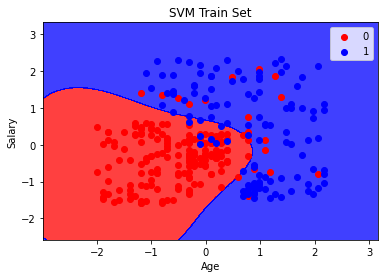

In [45]:
#ravel return contiguous flattened array
plot.contourf(X1,X2, svmclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plot.xlim(X1.min(), X1.max())
plot.ylim(X2.min(), X2.max())

# plotting train set points in form of scatter plots wit decision bounday
for i,j in enumerate(np.unique(Y_set)):
  plot.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], 
               c = ListedColormap(('red', 'blue'))(i), label = j)

plot.title("SVM Train Set")
plot.xlabel("Age")
plot.ylabel("Salary")
plot.legend()
plot.show()

In [28]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


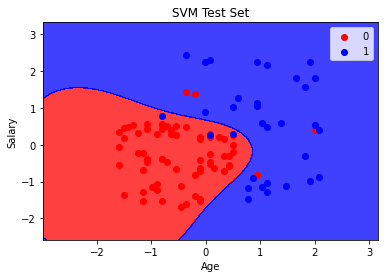

In [46]:
#repeating the process on test set with train set
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
plot.contourf(X1,X2, svmclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plot.xlim(X1.min(), X1.max())
plot.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(Y_set)):
  plot.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], 
               c = ListedColormap(('red', 'blue'))(i), label = j)

plot.title("SVM Test Set")
plot.xlabel("Age")
plot.ylabel("Salary")
plot.legend()
plot.show()